In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import GridSearchCV,KFold, cross_val_score
warnings.filterwarnings("ignore")

In [2]:
cardio = pd.read_csv('data/cardio.csv',sep=',')
stroke = pd.read_csv('data/stroke.csv')

# 1.Model for cardio

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [4]:
X = cardio.drop("cardio", axis=1)
y = cardio["cardio"]

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68426 entries, 0 to 68425
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68426 non-null  int64  
 1   gender       68426 non-null  int64  
 2   height       68426 non-null  int64  
 3   weight       68426 non-null  float64
 4   ap_hi        68426 non-null  int64  
 5   ap_lo        68426 non-null  int64  
 6   cholesterol  68426 non-null  int64  
 7   gluc         68426 non-null  int64  
 8   smoke        68426 non-null  int64  
 9   alco         68426 non-null  int64  
 10  active       68426 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 5.7 MB


In [6]:
print(X['cholesterol'].unique() )
print(X['gluc'].unique() )

[1 3 2]
[1 2 3]


## onehot

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 

ohe=OneHotEncoder()
X['cholesterol'] = pd.Categorical(X['cholesterol'])
dfdummies_ch=pd.get_dummies(X['cholesterol'],prefix='cholesterol_encoded')

X['gluc']=pd.Categorical(X['gluc'])
dfmumies_gluc=pd.get_dummies(X['gluc'],prefix='gluc_encoded')


X.drop(['cholesterol'], axis=1, inplace=True)
X.drop(["gluc"], axis=1, inplace=True)

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68426 entries, 0 to 68425
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     68426 non-null  int64  
 1   gender  68426 non-null  int64  
 2   height  68426 non-null  int64  
 3   weight  68426 non-null  float64
 4   ap_hi   68426 non-null  int64  
 5   ap_lo   68426 non-null  int64  
 6   smoke   68426 non-null  int64  
 7   alco    68426 non-null  int64  
 8   active  68426 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.7 MB


In [8]:
X=pd.concat([X,dfdummies_ch],axis=1)
X=pd.concat([X,dfmumies_gluc],axis=1) 

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68426 entries, 0 to 68425
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    68426 non-null  int64  
 1   gender                 68426 non-null  int64  
 2   height                 68426 non-null  int64  
 3   weight                 68426 non-null  float64
 4   ap_hi                  68426 non-null  int64  
 5   ap_lo                  68426 non-null  int64  
 6   smoke                  68426 non-null  int64  
 7   alco                   68426 non-null  int64  
 8   active                 68426 non-null  int64  
 9   cholesterol_encoded_1  68426 non-null  uint8  
 10  cholesterol_encoded_2  68426 non-null  uint8  
 11  cholesterol_encoded_3  68426 non-null  uint8  
 12  gluc_encoded_1         68426 non-null  uint8  
 13  gluc_encoded_2         68426 non-null  uint8  
 14  gluc_encoded_3         68426 non-null  uint8  
dtypes:

In [9]:
#standardlization
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
columns = ['age','height','weight','ap_hi','ap_lo']
scaled = std.fit_transform(X[['age','height','weight','ap_hi','ap_lo']])
scaled = pd.DataFrame(scaled,columns=columns)

X=X.drop(columns=columns,axis=1)
X=X.merge(scaled, left_index=True, right_index=True, how = "left")
X 


,gender,smoke,alco,active,cholesterol_encoded_1,cholesterol_encoded_2,cholesterol_encoded_3,gluc_encoded_1,gluc_encoded_2,gluc_encoded_3,age,height,weight,ap_hi,ap_lo
0,2,0,0,1,1,0,0,1,0,0,-0.416121,0.444384,-0.844510,-1.017996,-0.121137
1,1,0,0,1,0,0,1,1,0,0,0.322223,-1.021610,0.764337,0.848567,0.939519
2,1,0,0,0,0,0,1,1,0,0,-0.268452,0.077885,-0.704611,0.226379,-1.181793
3,2,0,0,1,1,0,0,1,0,0,-0.711458,0.566550,0.554488,1.470754,2.000175
4,1,0,0,0,1,0,0,1,0,0,-0.859126,-1.021610,-1.264210,-1.640183,-2.242449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68421,2,1,0,1,1,0,0,1,0,0,-0.120783,0.444384,0.134788,-0.395808,-0.121137
68422,1,0,0,1,0,1,0,0,1,0,1.208234,-0.777278,3.632283,0.848567,0.939519
68423,2,0,1,0,0,0,1,1,0,0,-0.120783,2.276877,2.163335,3.337317,0.939519
68424,1,0,0,0,1,0,0,0,1,0,1.208234,-0.166447,-0.145011,0.537473,-0.121137


In [10]:
X_train_cardio, X_test_cardio, y_train_cardio, y_test_cardio = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
len(X_test_cardio) 


13686

In [12]:
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [13]:
rf_clf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid_search.fit(X_train_cardio, y_train_cardio)
best_rf_clf = rf_grid_search.best_estimator_

In [14]:
rf_grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [15]:
best_rf_clf = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)

best_rf_clf.fit(X_train_cardio, y_train_cardio)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report


y_pred_cardio = best_rf_clf.predict(X_test_cardio)

accuracy_cardio = accuracy_score(y_test_cardio, y_pred_cardio)
recall_cardio = recall_score(y_test_cardio, y_pred_cardio)
precision_cardio = precision_score(y_test_cardio, y_pred_cardio)
f1_score_cardio = f1_score(y_test_cardio, y_pred_cardio)

report = classification_report(y_test_cardio, y_pred_cardio)

print(f"Randomforest:results of cardio:")
print(f"Accuracy: {accuracy_cardio:.4f}")
print(f"Recall: {recall_cardio:.4f}")
print(f"Precision: {precision_cardio:.4f}")
print(f"F1 Score: {f1_score_cardio:.4f}")
print(report)

Randomforest:results of cardio:
Accuracy: 0.7328
Recall: 0.6579
Precision: 0.7610
F1 Score: 0.7057
              precision    recall  f1-score   support

           0       0.71      0.80      0.76      7022
           1       0.76      0.66      0.71      6664

    accuracy                           0.73     13686
   macro avg       0.74      0.73      0.73     13686
weighted avg       0.74      0.73      0.73     13686



## stacking for cardio

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)


base_models = [
    ('rf', best_rf_clf),
    ('lr', lr)
]

In [18]:
from sklearn.linear_model import LogisticRegression

stacking_clf = StackingClassifier(estimators=base_models, cv=5, n_jobs=-1)
stacking_clf.fit(X_train_cardio, y_train_cardio)


y_pred_stacking = stacking_clf.predict(X_test_cardio)


accuracy_cardio = accuracy_score(y_test_cardio, y_pred_stacking)
recall_cardio = recall_score(y_test_cardio, y_pred_stacking)
precision_cardio = precision_score(y_test_cardio, y_pred_stacking)
f1_score_cardio = f1_score(y_test_cardio, y_pred_stacking)

report = classification_report(y_test_cardio, y_pred_stacking)

print(f"stacking:results for cardio")
print(f"Accuracy: {accuracy_cardio:.4f}")
print(f"Recall: {recall_cardio:.4f}")
print(f"Precision: {precision_cardio:.4f}")
print(f"F1 Score: {f1_score_cardio:.4f}")
print(report)

stacking:results for cardio
Accuracy: 0.7329
Recall: 0.6654
Precision: 0.7568
F1 Score: 0.7081
              precision    recall  f1-score   support

           0       0.72      0.80      0.75      7022
           1       0.76      0.67      0.71      6664

    accuracy                           0.73     13686
   macro avg       0.74      0.73      0.73     13686
weighted avg       0.74      0.73      0.73     13686



## boosting

In [33]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

def grid_search(model, parameters, features, labels):
  cv = GridSearchCV(model, parameters, cv=5,n_jobs=-1)
  cv.fit(features, labels.values.ravel())
  print_results(cv)

  return cv 

In [19]:
boosting = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators=50)

In [20]:

boosting.fit(X_train_cardio, y_train_cardio)
y_pred_stacking = boosting.predict(X_test_cardio)


accuracy_cardio = accuracy_score(y_test_cardio, y_pred_stacking)
recall_cardio = recall_score(y_test_cardio, y_pred_stacking)
precision_cardio = precision_score(y_test_cardio, y_pred_stacking)
f1_score_cardio = f1_score(y_test_cardio, y_pred_stacking) 

report = classification_report(y_test_cardio, y_pred_stacking)

print(f"boosting:results of cardio")
print(f"Accuracy: {accuracy_cardio:.4f}")
print(f"Recall: {recall_cardio:.4f}")
print(f"Precision: {precision_cardio:.4f}")
print(f"F1 Score: {f1_score_cardio:.4f}")
print(report)

boosting:results of cardio
Accuracy: 0.7329
Recall: 0.6841
Precision: 0.7463
F1 Score: 0.7138
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      7022
           1       0.75      0.68      0.71      6664

    accuracy                           0.73     13686
   macro avg       0.73      0.73      0.73     13686
weighted avg       0.73      0.73      0.73     13686



[[5472 1550]
 [2105 4559]]


Text(30.5, 0.5, 'true')

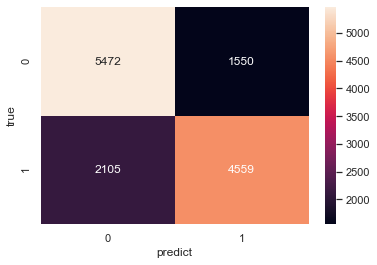

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
f,ax = plt.subplots()

C2 = confusion_matrix(y_test_cardio, y_pred_stacking,labels=[0,1])

print(C2)
sns.heatmap(C2,annot=True,ax=ax,fmt='.20g') 

ax.set_xlabel('predict') 
ax.set_ylabel('true') 

In [25]:
boosting = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators=50)
stacking = stacking_clf
bagging = best_rf_clf

#Ensemble models 
ensembles = [] 
ensembles.append(('Boosting', boosting))
ensembles.append(('Bagging',bagging))
ensembles.append(('Stacking',stacking))

In [26]:
results = []
names = []
seed = 0
for name, model in ensembles:
    cv_results = cross_val_score(model, X_train_cardio, y_train_cardio, cv=5, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'Method_{name}| mean:{cv_results.mean()}  std:{cv_results.std()}')

Method_Boosting| mean:0.7354950675922542  std:0.0049511140697574485
Method_Bagging| mean:0.7342345633905736  std:0.00480442631560291
Method_Stacking| mean:0.7339240043843624  std:0.004939506927795653


In [27]:
results 

[array([0.73666423, 0.73940446, 0.74113993, 0.72725612, 0.7330106 ]),
 array([0.73876507, 0.7374863 , 0.73766898, 0.72643405, 0.73081841]),
 array([0.73803434, 0.73538546, 0.73885641, 0.72524662, 0.73209719])]

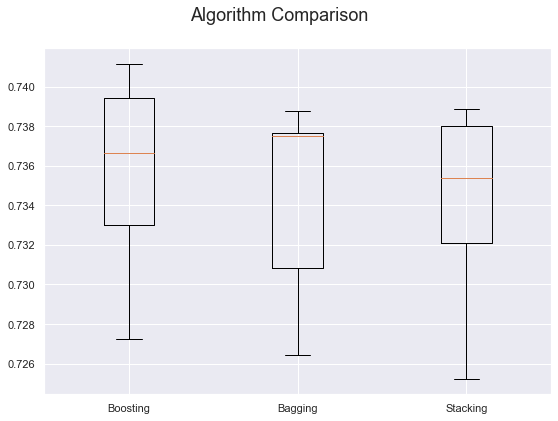

In [28]:
from matplotlib import pyplot
pyplot.rcParams.update({'font.size': 15})
fig, ax = pyplot.subplots(figsize=(8, 6))
fig.suptitle('Algorithm Comparison')
pyplot.boxplot(results, showfliers=False)
ax.set_xticklabels(names)
pyplot.tight_layout()
pyplot.show()

# 2.Model fo stroke

In [22]:
X = stroke.drop("stroke", axis=1)
y = stroke["stroke"]

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 399.3 KB


## onehot

In [23]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 

ohe=OneHotEncoder()
X['gender'] = pd.Categorical(X['gender'])
dfdummies_gender=pd.get_dummies(X['gender'],prefix='gender_encoded')

X['smoking_status']=pd.Categorical(X['smoking_status'])
dfmumies_smoking_status=pd.get_dummies(X['smoking_status'],prefix='smoking_status_encode')

X['work_type'] = pd.Categorical(X['work_type'])
dfDummies_work_type = pd.get_dummies(X['work_type'], prefix = 'work_type_encoded')


X.drop(['gender'], axis=1, inplace=True)
X.drop(["work_type"], axis=1, inplace=True)
X.drop(["smoking_status"], axis=1, inplace=True)
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   int64  
 4   Residence_type     5110 non-null   int64  
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                5110 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 279.6 KB


In [24]:

X=pd.concat([X,dfdummies_gender],axis=1)
X=pd.concat([X,dfDummies_work_type],axis=1)
X=pd.concat([X,dfmumies_smoking_status],axis=1) 
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5110 non-null   float64
 1   hypertension             5110 non-null   int64  
 2   heart_disease            5110 non-null   int64  
 3   ever_married             5110 non-null   int64  
 4   Residence_type           5110 non-null   int64  
 5   avg_glucose_level        5110 non-null   float64
 6   bmi                      5110 non-null   float64
 7   gender_encoded_0         5110 non-null   uint8  
 8   gender_encoded_1         5110 non-null   uint8  
 9   gender_encoded_2         5110 non-null   uint8  
 10  work_type_encoded_0      5110 non-null   uint8  
 11  work_type_encoded_1      5110 non-null   uint8  
 12  work_type_encoded_2      5110 non-null   uint8  
 13  work_type_encoded_3      5110 non-null   uint8  
 14  work_type_encoded_4     

In [25]:
#standardlization
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(X[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)


X=X.drop(columns=columns,axis=1)
X=X.merge(scaled, left_index=True, right_index=True, how = "left")
X 


,hypertension,heart_disease,ever_married,Residence_type,gender_encoded_0,gender_encoded_1,gender_encoded_2,work_type_encoded_0,work_type_encoded_1,work_type_encoded_2,work_type_encoded_3,work_type_encoded_4,smoking_status_encode_0,smoking_status_encode_1,smoking_status_encode_2,smoking_status_encode_3,avg_glucose_level,bmi,age
0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,2.706375,0.928080,1.051434
1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,2.121559,-2.913002,0.786070
2,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,-0.005028,0.497795,1.626390
3,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1.437358,0.697195,0.255342
4,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1.501184,-0.394260,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,-0.494658,-2.913002,1.626390
5106,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0.420775,1.284902,1.670617
5107,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,-0.511443,0.298394,-0.363842
5108,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1.328257,-0.226344,0.343796


In [26]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [27]:
# -*- coding: utf-8 -*-
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0,replacement=True) 
x_resample,y_resample=rus.fit_resample(X,y) 

In [28]:
len(x_resample)

498

In [29]:
X_train_stroke, X_test_stroke, y_train_stroke, y_test_stroke = train_test_split(x_resample,y_resample, test_size=0.2, random_state=42)
#X_train_stroke, X_test_stroke, y_train_stroke, y_test_stroke = train_test_split(X,y, test_size=0.2, random_state=42) 

In [30]:
#from imblearn.under_sampling import SMOTE
#smote=SMOTE(random_state=42)
#X_train_stroke,y_train_stroke=smote.fit_resample(X,y)

In [31]:
gb_param_grid = {
    "n_estimators": [50,100,200],
    "max_depth": [3, 5, 8],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [34]:
gb=GradientBoostingClassifier(random_state=42)
cv_gb_model = grid_search(gb, gb_param_grid,X_train_stroke, y_train_stroke) 

BEST PARAMS: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

0.741 (+/-0.075) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.744 (+/-0.055) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.734 (+/-0.051) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.739 (+/-0.06) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
0.749 (+/-0.063) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.714 (+/-0.095) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.741 (+/-0.068) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
0.736 (+/-0.036) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.721 (+/-0.05) for {'max_depth': 3, 'min_samples_leaf':

In [16]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

def grid_search(model, parameters, features, labels):
  cv = GridSearchCV(model, parameters, cv=5,n_jobs=-1)
  cv.fit(features, labels.values.ravel())
  print_results(cv)

  return cv 

In [17]:
# Bagging example
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [ 50,100, 250, 500],
    'max_depth': [4, 8, 16, 32, ]}
cv_rf_model = grid_search(rf, parameters,X_train_stroke, y_train_stroke)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.784 (+/-0.061) for {'max_depth': 4, 'n_estimators': 50}
0.776 (+/-0.039) for {'max_depth': 4, 'n_estimators': 100}
0.779 (+/-0.043) for {'max_depth': 4, 'n_estimators': 250}
0.771 (+/-0.033) for {'max_depth': 4, 'n_estimators': 500}
0.756 (+/-0.07) for {'max_depth': 8, 'n_estimators': 50}
0.776 (+/-0.076) for {'max_depth': 8, 'n_estimators': 100}
0.766 (+/-0.039) for {'max_depth': 8, 'n_estimators': 250}
0.764 (+/-0.04) for {'max_depth': 8, 'n_estimators': 500}
0.756 (+/-0.052) for {'max_depth': 16, 'n_estimators': 50}
0.771 (+/-0.056) for {'max_depth': 16, 'n_estimators': 100}
0.766 (+/-0.052) for {'max_depth': 16, 'n_estimators': 250}
0.766 (+/-0.034) for {'max_depth': 16, 'n_estimators': 500}
0.764 (+/-0.062) for {'max_depth': 32, 'n_estimators': 50}
0.754 (+/-0.064) for {'max_depth': 32, 'n_estimators': 100}
0.766 (+/-0.046) for {'max_depth': 32, 'n_estimators': 250}
0.766 (+/-0.043) for {'max_depth': 32, 'n_estimators': 500}


In [18]:
from sklearn.linear_model import LogisticRegression 
# Stacking example
estimators = [('rf', RandomForestClassifier()),
              ('gb', GradientBoostingClassifier())]

sc = StackingClassifier(estimators=estimators)
sc.get_params()
parameters = {
    'gb__n_estimators': [50, 100],
    'rf__n_estimators': [50, 100],
    'final_estimator': [LogisticRegression(C=0.1),
                        LogisticRegression(C=1),
                        LogisticRegression(C=10)],
    'passthrough': [True, False]
}
cv_stack_model = grid_search(sc, parameters, X_train_stroke, y_train_stroke)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

BEST PARAMS: {'final_estimator': LogisticRegression(C=10), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 50}

0.771 (+/-0.078) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': True, 'rf__n_estimators': 50}
0.774 (+/-0.075) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': True, 'rf__n_estimators': 100}
0.756 (+/-0.054) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 50}
0.766 (+/-0.061) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 100}
0.771 (+/-0.078) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 100, 'passthrough': True, 'rf__n_estimators': 50}
0.771 (+/-0.078) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 100, 'passthrough': True, 'rf__n_estimators': 100}
0.764 (+/-0.044) for {'final_estimator': 

In [19]:
y_resample.value_counts()

1    249
0    249
Name: stroke, dtype: int64

In [35]:
from sklearn.metrics import classification_report

boosting = GradientBoostingClassifier(min_samples_leaf=4, n_estimators=50, random_state=42,max_depth=3)
#stacking = StackingClassifier(estimators= [('rf', RandomForestClassifier(n_estimators=50)),('gb', GradientBoostingClassifier(n_estimators=100))])
estimators = [('rf', RandomForestClassifier(n_estimators=50)),
              ('gb', GradientBoostingClassifier(n_estimators=100))]
stacking=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(C=10),passthrough=False)
bagging = RandomForestClassifier(max_depth=4, n_estimators=250)

boosting.fit(X_train_stroke, y_train_stroke)
y_pred_boosting = boosting.predict(X_test_stroke)

accuracy_stroke = accuracy_score(y_test_stroke, y_pred_boosting)
recall_stroke = recall_score(y_test_stroke, y_pred_boosting)
precision_stroke = precision_score(y_test_stroke, y_pred_boosting)
f1_score_stroke = f1_score(y_test_stroke, y_pred_boosting)

report_1 = classification_report(y_test_stroke, y_pred_boosting)

print(f"boosting :stroke")
print(f"Accuracy: {accuracy_stroke:.4f}")
print(f"Recall: {recall_stroke:.4f}")
print(f"Precision: {precision_stroke:.4f}")
print(f"F1 Score: {f1_score_stroke:.4f}")
print(report_1)



stacking.fit(X_train_stroke, y_train_stroke)
y_pred_stacking = stacking.predict(X_test_stroke)

accuracy_stroke = accuracy_score(y_test_stroke, y_pred_stacking)
recall_stroke= recall_score(y_test_stroke, y_pred_stacking)
precision_stroke = precision_score(y_test_stroke, y_pred_stacking)
f1_score_stroke = f1_score(y_test_stroke, y_pred_stacking)

report_2 = classification_report(y_test_stroke, y_pred_stacking)
print(f"stacking:")
print(f"Accuracy: {accuracy_stroke:.4f}")
print(f"Recall: {recall_stroke:.4f}")
print(f"Precision: {precision_stroke:.4f}")
print(f"F1 Score: {f1_score_stroke:.4f}")
print(report_2)


bagging.fit(X_train_stroke, y_train_stroke)
y_pred_stacking = bagging.predict(X_test_stroke)

accuracy_stroke = accuracy_score(y_test_stroke, y_pred_stacking)
recall_stroke= recall_score(y_test_stroke, y_pred_stacking)
precision_stroke = precision_score(y_test_stroke, y_pred_stacking)
f1_score_stroke = f1_score(y_test_stroke, y_pred_stacking)

report_3 = classification_report(y_test_stroke, y_pred_stacking)

print(f"bagging:")
print(f"Accuracy: {accuracy_stroke:.4f}")
print(f"Recall: {recall_stroke:.4f}")
print(f"Precision: {precision_stroke:.4f}")
print(f"F1 Score: {f1_score_stroke:.4f}")
print(report_3)

#Ensemble models 
ensembles = [] 
ensembles.append(('Boosting', boosting))
ensembles.append(('Bagging',bagging))
ensembles.append(('Stacking',stacking))

boosting :stroke
Accuracy: 0.7900
Recall: 0.8776
Precision: 0.7414
F1 Score: 0.8037
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        51
           1       0.74      0.88      0.80        49

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100

stacking:
Accuracy: 0.7700
Recall: 0.8367
Precision: 0.7321
F1 Score: 0.7810
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        51
           1       0.73      0.84      0.78        49

    accuracy                           0.77       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100

bagging:
Accuracy: 0.7500
Recall: 0.8980
Precision: 0.6875
F1 Score: 0.7788
              precision    recall  f1-score   support

           0       0.86      0.61      0.71        51


In [48]:
results = []
names = []
seed = 0
for name, model in ensembles:
    cv_results = cross_val_score(model, X_train_stroke, y_train_stroke, cv=5, scoring= 'accuracy')
    results.append(cv_results) 
    names.append(name)
    print(f'Method_{name}| mean:{cv_results.mean()}  std:{cv_results.std()}')

Method_Boosting| mean:0.7561392405063291  std:0.040960957411248895
Method_Bagging| mean:0.7764240506329114  std:0.025135827142165307
Method_Stacking| mean:0.7713607594936709  std:0.01450320287960642


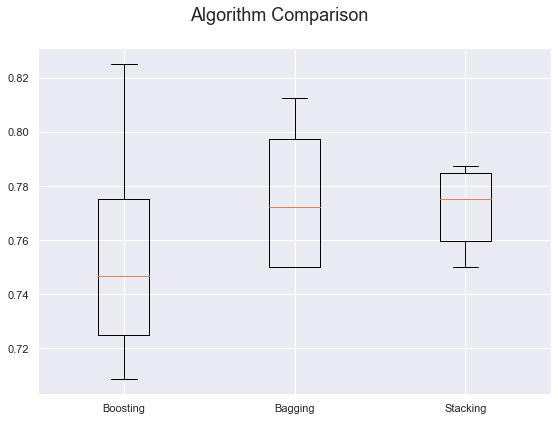

In [49]:
from matplotlib import pyplot
pyplot.rcParams.update({'font.size': 15})
fig, ax = pyplot.subplots(figsize=(8, 6))
fig.suptitle('Algorithm Comparison')
pyplot.boxplot(results, showfliers=False)
ax.set_xticklabels(names)
pyplot.tight_layout()
pyplot.show()

Method_Boosting| mean:0.8  std:0.0670820393249937
Method_Bagging| mean:0.86  std:0.025495097567963948
Method_Stacking| mean:0.8300000000000001  std:0.07648529270389176


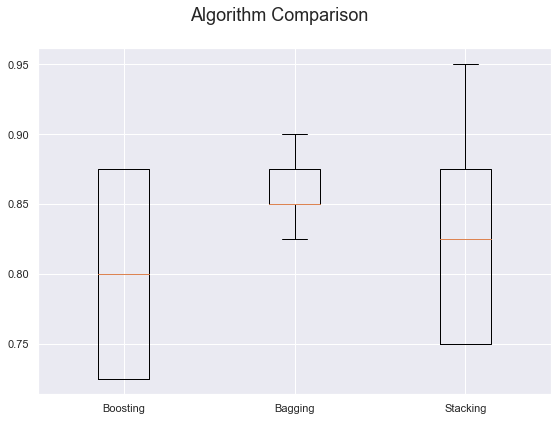

In [50]:
results = []
names = []
seed = 0
for name, model in ensembles:
    cv_results = cross_val_score(model, X_train_stroke, y_train_stroke, cv=5, scoring= 'recall') 
    results.append(cv_results)
    names.append(name)
    print(f'Method_{name}| mean:{cv_results.mean()}  std:{cv_results.std()}')
from matplotlib import pyplot
pyplot.rcParams.update({'font.size': 15})
fig, ax = pyplot.subplots(figsize=(8, 6))
fig.suptitle('Algorithm Comparison')
pyplot.boxplot(results, showfliers=False)
ax.set_xticklabels(names)
pyplot.tight_layout()
pyplot.show()

[[31 20]
 [ 4 45]]


Text(30.5, 0.5, 'true')

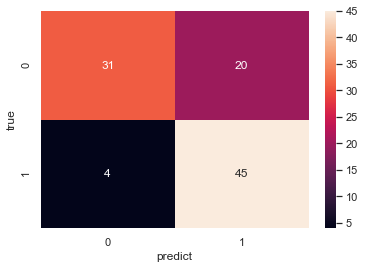

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
f,ax = plt.subplots()
y_pred_stacking = bagging.predict(X_test_stroke)
C2 = confusion_matrix(y_test_stroke, y_pred_stacking,labels=[0,1])

print(C2)
sns.heatmap(C2,annot=True,ax=ax,fmt='.20g') 

ax.set_xlabel('predict') 
ax.set_ylabel('true') 